<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


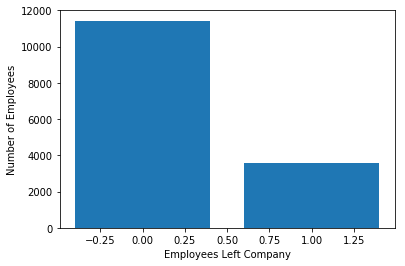

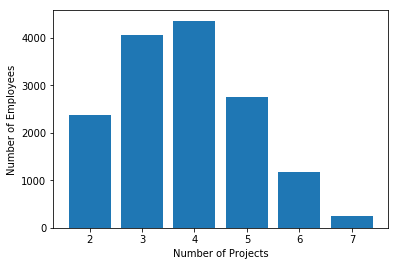

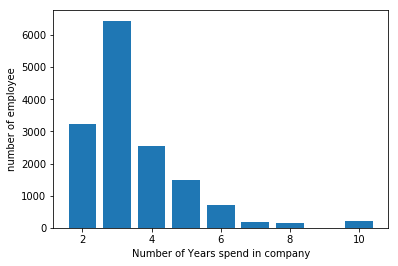

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py

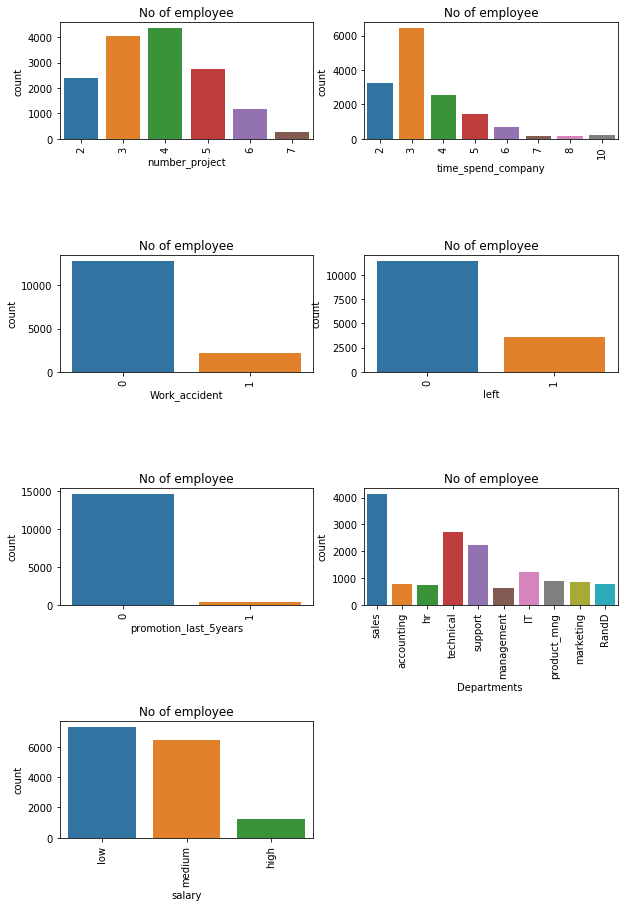

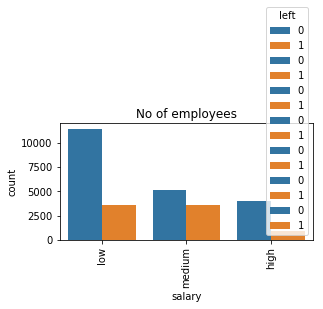

In [26]:
import pandas as pd
import numpy as np
#import data fropm file
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv('HR.csv')
#see the data
data
data.head()
data.tail()
data.info()#type of data
#look at the stats of people wo left the organisation
left=data.groupby('left')
left.mean()
#overall stats
data.describe()
#plot the datato see the counts
left_count=data.groupby('left').count()
plt.bar(left_count.index.values,left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()
data.left.value_counts()
#plot number of employees alloted to no. of projects
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()
#time spend in company
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years spend in company')
plt.ylabel('number of employee')
plt.show()
#plot all graph in single run
features=['number_project','time_spend_company','Work_accident','left','promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No of employee")
#some more subplots
fig=plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(4,2,1+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=data,hue='left')
    plt.xticks(rotation=90)
    plt.title("No of employees")

In [4]:
pwd

'C:\\Users\\IBS'

In [28]:
#Cluster Analysis
#import module
from sklearn.cluster import KMeans
#Filter data
left_emp=data[['satisfaction_level','last_evaluation']][data.left==1]
#create groups using K means clustering
kmeans=KMeans(n_clusters=3,random_state=0).fit(left_emp)